#Project Name: Ford-Go-Bike

####Project type: EDA


####Contribution: Individual

###Submitted by: Muskan Chauhan

#Project summary:

####Analyzed Ford GoBike sharing system data for January 2018, focusing on user behavior, trip durations, and patterns by demographics and station locations.

#Github Link:

https://github.com/Muskan-Chauhan2002

#Problem Statement:

####To explore and understand how users engage with Ford GoBike's service focusing on trip duration, demographics (age, gender), usage type (Subscriber vs Customer), and station popularity and find insights for business decisions.

####Define Your Business Objective?
 - How long does the average trip take?
 - Is the trip duration affected by weather( months/seasons)?
 - Does the above depend on if a user is a subscriber or customer?
 - Understand who uses the bike-share system and how.
 - Find factors influencing trip duration.



#1. Know Your Data

####Import Libraries

In [ ]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Dataset Loading

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

#define the path and load data
file_path = '/content/drive/MyDrive/Labmentix Projects/Ford-Go-bike sharing/201801-fordgobike-tripdata.csv.zip'
df = pnd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Dataset First View

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


##Dataset Rows & Columns count

In [ ]:
rows, columns = df.shape
print("rows:", rows)
print("columns:", columns)

rows: 94802
columns: 16


##Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

####Duplicate Values

In [ ]:
duplicate = df.duplicated().sum()
print(f"Total duplicate rows:{duplicate}")
df[df.duplicated()]

Total duplicate rows:0


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


###Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64


#### Visualizing the missing values

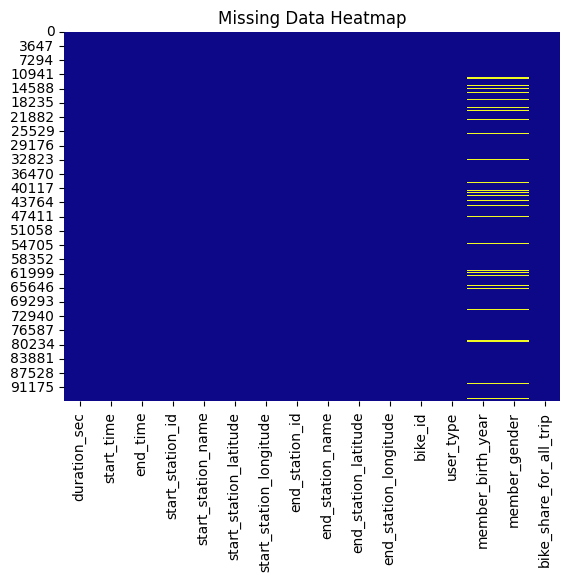

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='plasma')
plt.title('Missing Data Heatmap')
plt.show()

##What did you know about your dataset?

#2. Understanding Your Variables

In [ ]:
# Dataset Columns
for col in df.columns:
  print(col)

duration_sec
start_time
end_time
start_station_id
start_station_name
start_station_latitude
start_station_longitude
end_station_id
end_station_name
end_station_latitude
end_station_longitude
bike_id
user_type
member_birth_year
member_gender
bike_share_for_all_trip


In [ ]:
# Dataset Describe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


##Variables Description

###Check Unique Values for each variable.

In [ ]:
df.nunique()

,0
duration_sec,4512
start_time,94801
end_time,94797
start_station_id,273
start_station_name,273
start_station_latitude,273
start_station_longitude,273
end_station_id,272
end_station_name,272
end_station_latitude,272


#3. Data Wrangling

##Data Wrangling Code

In [ ]:
#Remove the duplicates
df.drop_duplicates()
print(f"Numbers of duplicates removed:", {df.duplicated().sum()})

#Remove nulls/missing values
df = df.dropna()
print(f"Number of nulls remaining after removal: {df.isnull().sum()}")


#Convert datatypes from objects to datatime
import pandas as pd

# Convert datatypes from object to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Fill missing birth years with the median
df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].median())
#convert to integer
df['member_birth_year'] = df['member_birth_year'].astype('Int64')
#new column : age
df['age'] = 2025 - df['member_birth_year']
df.dtypes


Numbers of duplicates removed: {np.int64(0)}
Number of nulls remaining after removal: duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64


,0
duration_sec,int64
start_time,datetime64[ns]
end_time,datetime64[ns]
start_station_id,int64
start_station_name,object
start_station_latitude,float64
start_station_longitude,float64
end_station_id,int64
end_station_name,object
end_station_latitude,float64


###What all manipulations have you done and insights you found?
 - Removed the Duplicates.
 - Dropped null rows.
 - Filled missing birth years with median before transformation.
 - Changed data types where needed: Object to Datetime.
 - Filled missing birth years with median.
 - Converting the birth year to Integer.
 - Created new column like age.



#4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

### Question - How long does the average trip take?

In [ ]:
# Calculate the average trip duration in seconds
average_trip_duration = df['duration_sec'].mean()

# Print the result
print(f"The average trip duration is {average_trip_duration:.2f} seconds.")






The average trip duration is 870.94 seconds.


###Chart - 1 Average Trip duration

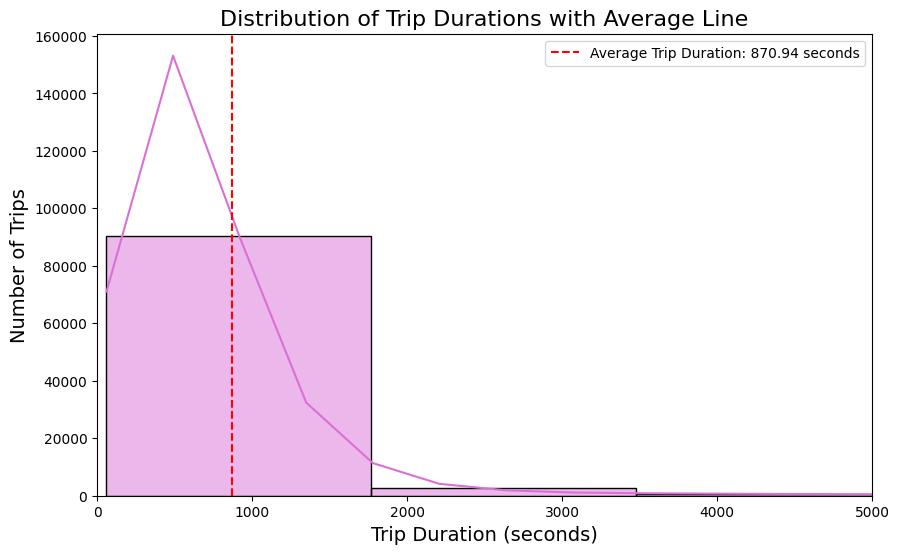

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average trip duration
average_trip_duration = df['duration_sec'].mean()

# Plot the histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(df['duration_sec'], bins=50, kde=True, color='orchid')

# Add a vertical line for the average trip duration
plt.axvline(average_trip_duration, color='red', linestyle='--', label=f'Average Trip Duration: {average_trip_duration:.2f} seconds')

# Add title and labels
plt.title('Distribution of Trip Durations with Average Line', fontsize=16)
plt.xlabel('Trip Duration (seconds)', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.legend()
plt.xlim(0, 5000)
plt.show()


####
1. Why did you pick the specific chart?

  I chose histogram because it visually represents the distribution of the trip durations, showing how frequently certain durations occur. The vertical line indicating the average helps highlight the central tendency (mean) of the data.

  2. What is/are the insight(s) found from the chart?

   According to the chart, Most trips seem to last under 1500 seconds (around 25 minutes). The red vertical line represents the average trip duration, which helps us understand the overall central tendency. This value gives a reference for users, showing how trip lengths compare to the overall average.

   3. Will the gained insights help create a positive business impact?

   Knowing that the majority of trips are short in duration, the company can focus on having more bikes available during peak short-trip hours.

   4. Are there any insights that lead to negative growth? Justify with specific reason.

   data shows that many bikes remain unused for extended periods due to a high number of short-duration trips, the company could face underutilization issues. In this case, it may need to consider offering more flexible pricing models.

###Chart - 2

<ipython-input-14-de439005ee07>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='user_type', palette='Set2')


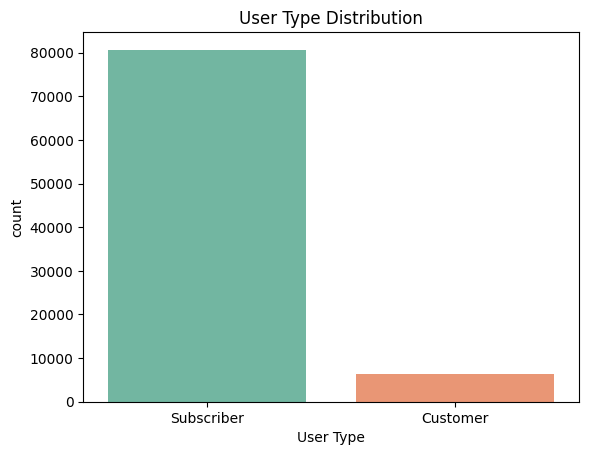

In [ ]:
#User type distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='user_type', palette='Set2')
plt.title('User Type Distribution')
plt.xlabel('User Type')
plt.ylabel('count')
plt.show()

####
1. Why did you pick the specific chart?

 I chose the countplot chart specifically because it makes it easier to show the comparison in User Type which is vital factor for any business strategy and decision.

2. What is/are the insight(s) found from the chart?

 Countplot shows the comparison between the User type by Subscriber and Customer. From the chart I can comprehend that there are more subscriber than casual customers, which means that Ford Go bike is able to retain the customers as regular subscribers.

3. Will the gained insights help creating a positive business impact?

 The gained insights will have positive effects on the business as according to the insights the a large amount of people are subscribers e.g Regular users. The business can go after customers to make them subscribers.

4. Are there any insights that lead to negative growth? Justify with specific reason.
 If the trips are low despite high number of subscriber that means the Ford Go bike program is not utilized efficiently.





###Chart - 3

<ipython-input-15-171cb0b40608>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='member_gender',palette='Set1')


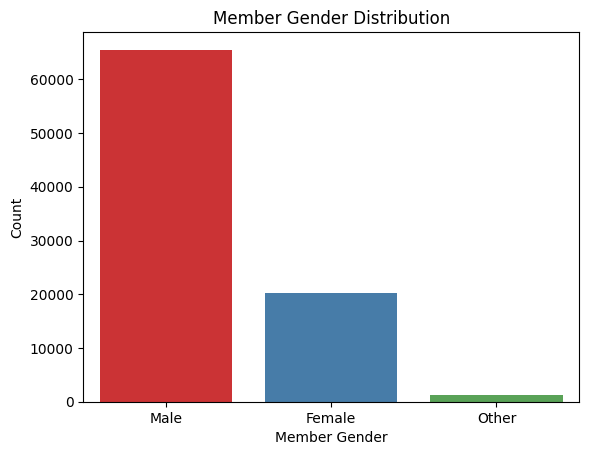

In [ ]:
#Member Gender Distribution
sns.countplot(data=df,x='member_gender',palette='Set1')
plt.title('Member Gender Distribution')
plt.xlabel('Member Gender')
plt.ylabel('Count')
plt.show()

####
 1. Why did you pick the specific chart?

  I pick the countplot chart to show the gender distribution of the members apparently. It is comprehensible.

 2. What is/are the insight(s) found from the chart?

   Insights from the chart show that the number of Males is higher than both
   Female and Other combined. Male population is 3 times the population of female.

3. Will the gained insights help creating a positive business impact?

   Yes, insights can help the business to promote the inclusive environment for both females and others. Business can make efforts to engage more female users with the help of such organisations that advocate gender equality.

4. Are there any insights that lead to negative growth? Justify with specific reason.

  If the business does not take any steps towards the gender inclusive promotion then their would be a lopsided growth in only one segment of the users and business would loose on the opportunity to engage more customers in the Ford go bike program.


###Chart - 4

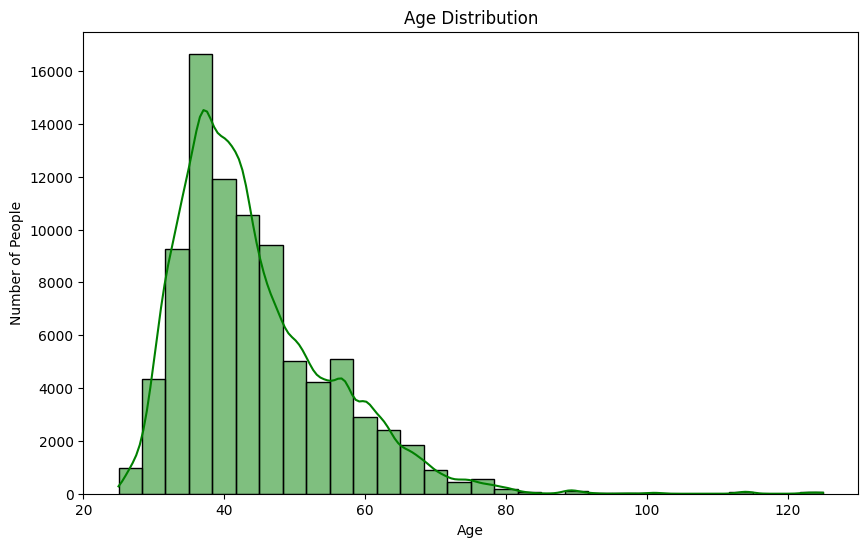

In [ ]:
#Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='Green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

####
 1. Why did you pick the specific chart?

 I selected the histogram as the user base is distributed across different age group.

 2. What is/are the insight(s) found from the chart?

 Insights gained from the histogram shows that there is a particular age group more engaged here. The age group is 30 - 50 years.

 3. Will the gained insights help creating a positive business impact?
  
  Yes, the gained insights will help in creating the specific age group marketing efforts to increase the business operations.

 4. Are there any insights that lead to negative growth? Justify with specific reason.

  Focusing on the age group excluded, the business may thrive. The business may miss out the opportunity by targeting only a speicific demography.

###Chart - 5

<ipython-input-17-28cdcac0a502>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.values, y=top_stations.index, palette='Greens')


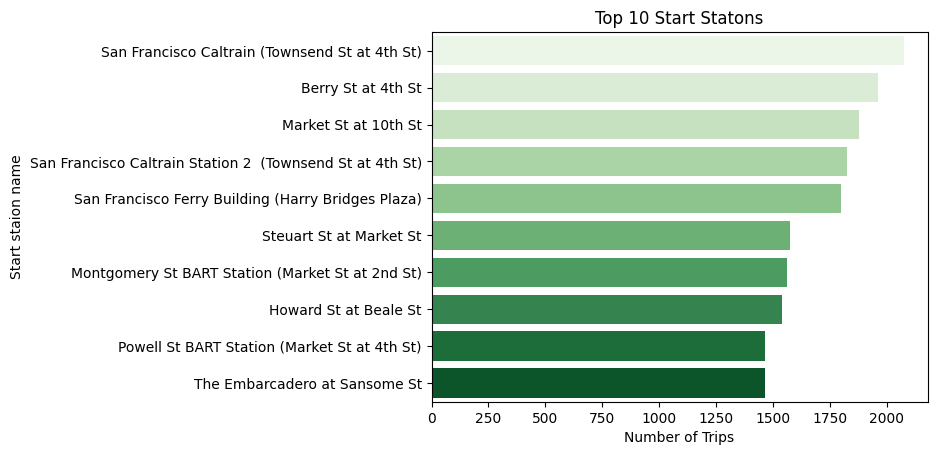

In [ ]:
#Top 10 Start stations
top_stations = df['start_station_name'].value_counts().head(10)
sns.barplot(x=top_stations.values, y=top_stations.index, palette='Greens')
plt.title('Top 10 Start Statons')
plt.xlabel('Number of Trips')
plt.ylabel('Start staion name')
plt.show()


####
  1. Why did you pick the specific chart?
  
  The barplot is displaying the Top 10 start stations along with the Number of Trips effectively.

  2. What is/are the insight(s) found from the chart?

   The barplot shows the Top 10 most used start stations in the city. It clearly shows which stations are the famous one.

  3. Will the gained insights help creating a positive business impact?

   Yes, the insights will help the business to identify which stations' infrastructure need to repair regularly, where is the need to install more bikes.

  4. Are there any insights that lead to negative growth? Justify with specific reason.

   Start stations with low popularity indicates that the infrastructure might not be up to date with the users need, or the location is not accessible to them.

###Chart - 6

<ipython-input-18-c14c55e7ea45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.values, y=top_stations.index, palette='Reds')


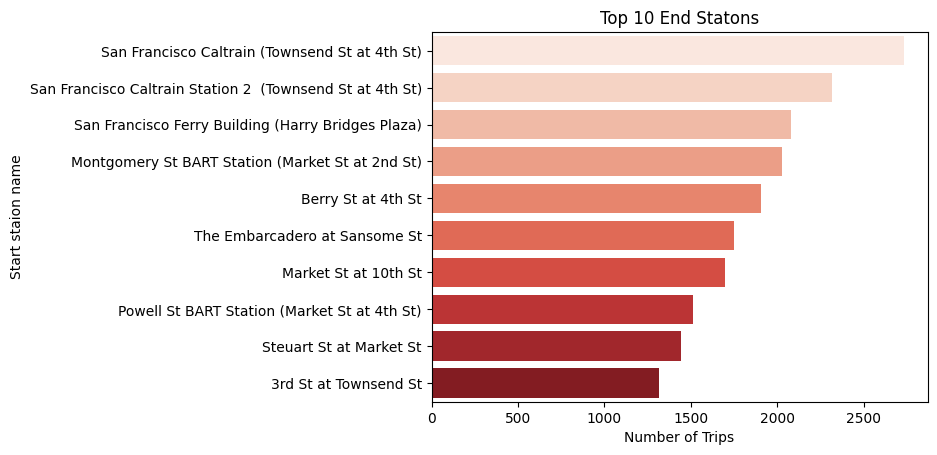

In [ ]:
#Top 10 End Stations
top_stations = df['end_station_name'].value_counts().head(10)
sns.barplot(x=top_stations.values, y=top_stations.index, palette='Reds')
plt.title('Top 10 End Statons')
plt.xlabel('Number of Trips')
plt.ylabel('Start staion name')
plt.show()


####
  1. Why did you pick the specific chart?
  
  The barplot is displaying the Top 10 end stations complementing the start stations and help to understand the journey.

  2. What is/are the insight(s) found from the chart?

  Identifying the top end stations will reveal if certain areas are more popular destinations. This can help optimize bike positioning and improve station placement.

  3. Will the gained insights help creating a positive business impact?

   Yes, knowing the popular end spots will help to ensure the availability of the bikes and increase the user satisfaction.

  4. Are there any insights that lead to negative growth? Justify with specific reason.

   Low usage of the stations represent the lack of infrastructure as per the users' demand. Business can improve the certain areas.

###Chart - 7

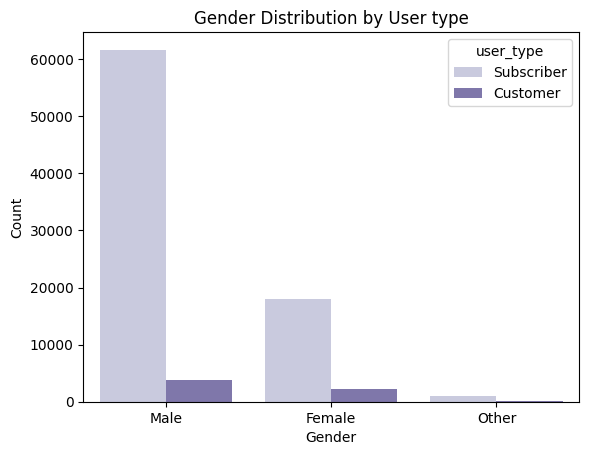

In [ ]:
#Gender Distribution by User Type
sns.countplot(data=df, x='member_gender', hue='user_type', palette='Purples')
plt.title('Gender Distribution by User type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

####
1. Why did you pick the specific chart?

 I chose a count plot with hue because it helps compare gender distribution across user types (subscriber vs. customer), enclosing if specific gender prefer specific type of membership.

2. What is/are the insight(s) found from the chart?

 The chart shows that all categories in the gender prefers subscription user type. However, the Male population is greater than both female and other gender combined.

3. Will the gained insights help creating a positive business impact?

 Yes, the insights can help tailoring the marketing strategies to retain the gender and user type.
4.Are there any insights that lead to negative growth? Justify with specific reason.

 If there is an imbalance among the gender preferences, it means that the business is unable to tempt the customers equally. Resolving this issue could help to increase the diversity and inclusiveness.

###Chart - 8 Average Trip Duration by User Type

<ipython-input-20-7223aae9ad25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='user_type', y='duration_sec', palette='pastel', estimator='mean')


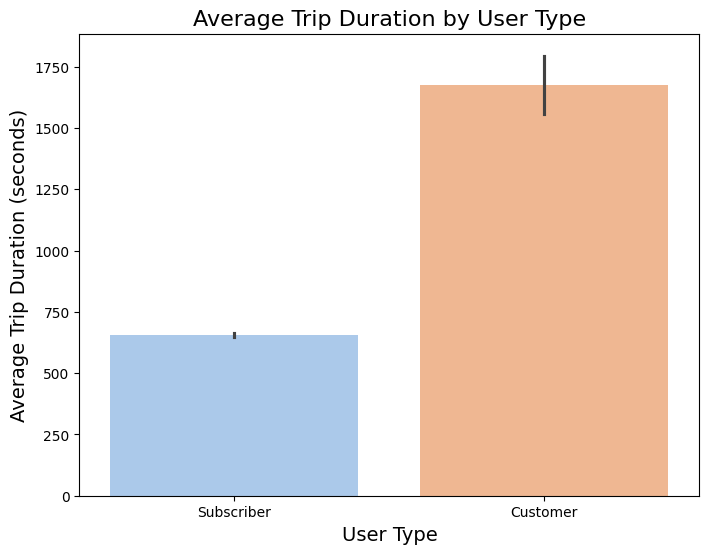

In [ ]:
# Barplot version: Mean trip duration by user type
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='user_type', y='duration_sec', palette='pastel', estimator='mean')

# Titles and labels
plt.title('Average Trip Duration by User Type', fontsize=16)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Average Trip Duration (seconds)', fontsize=14)

plt.show()



####
1. Why did you pick the specific chart?

 I pick barplot as it gives a clear image of Average trip duration in seconds between different user type.

2. What is/are the insight(s) found from the chart?

 The chart shows whether the subscriber or Customer takes longer trips. Clearly, the customers are taking longer trips as compared to the subscribers.

3. Will the gained insights help creating a positive business impact?

 Yes, the user type and their trip duration can help to strategize the pricing policies and install new packages for different type of users.
4.Are there any insights that lead to negative growth? Justify with specific reason.

 Even though subscribers are the regular users, they are using it for the shorter trips as compared to the leisure users with longer trips. It indicates that the subscribers are not using the bikes to its full potential.


###Chart - 9

<ipython-input-28-0ec74cde229c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bike_share_for_all_trip', palette='Accent')


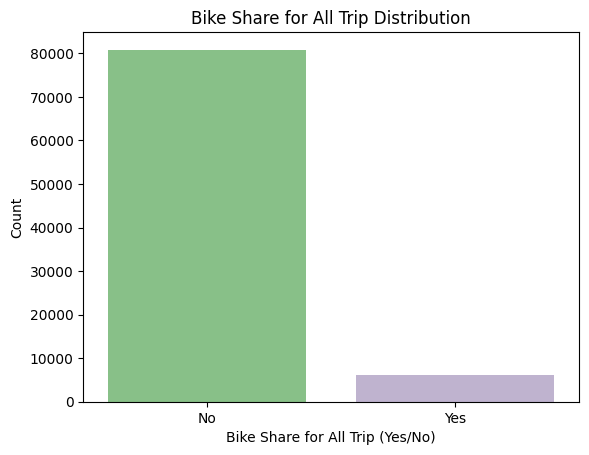

In [ ]:
sns.countplot(data=df, x='bike_share_for_all_trip', palette='Accent')
plt.title('Bike Share for All Trip Distribution')
plt.xlabel('Bike Share for All Trip (Yes/No)')
plt.ylabel('Count')
plt.show()


####
1. Why did you pick the specific chart?

 I selected the countplot because it effectively visualizes categorical data, in this case, the distribution of whether bikes were shared for all trips or not. It clearly show how many bikes were shared and how many were not.

2. What is/are the insight(s) found from the chart?

 "Yes" category is significantly larger, it indicates that most users are taking advantage of the bike share feature, which could suggest that the service is well-utilized.
 "No" category people are not leveraging the bike share feature.

3. Will the gained insights help create a positive business impact?

 Yes, As many users are sharing bikes, business can allocate more bikes in those stations. And business can also adjust pricing and promotional activities to encourage sharing.

4. Are there any insights that lead to negative growth? Justify with specific reason.

 Customers may not be aware of the bike share option or how it works, which could be a barrier to its usage. Some people might just prefer their own bikes suggesting that bike share service need to be improved.

###Chart - 10

<ipython-input-42-e5afadf69ca6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour_of_day', palette='Blues')


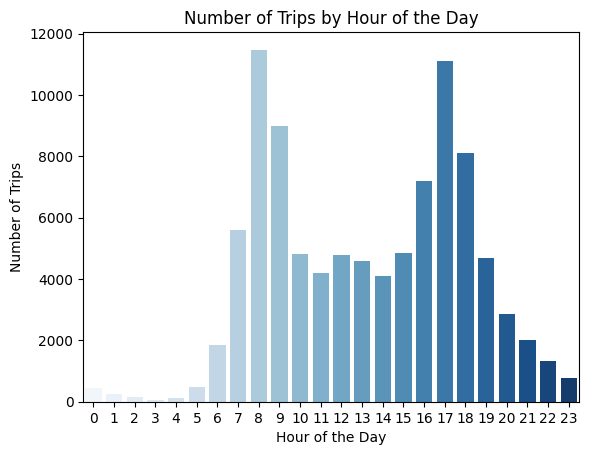

In [42]:
df['hour_of_day'] = pd.to_datetime(df['start_time']).dt.hour
sns.countplot(data=df, x='hour_of_day', palette='Blues')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()


####1. Why did you pick the specific chart?

 I selected the countplot to visualize how the number of trips varies throughout the day based on the hour. It allows for a clear understanding of peak hours during the day when the bike-sharing system is most used.

2. What is/are the insight(s) found from the chart?

 From the insights I have observed that user prefer to use bike during Morning  and Evening. Low Usage hours indicate low demand during Early morning, Noon and then late night hours.

3. Will the gained insights help create a positive business impact?

 By identifying peak and off-peak hours, businesses can allocate more bikes during high-demand times and reduce the fleet size during slow periods. Business can ensure that there are enough bikes available during busy hours.

4. Are there any insights that lead to negative growth? Justify with specific reason.

 If too many bikes are allocated during off-peak hours, it could result in wasted resources and operational inefficiencies.



###Chart - 11 Average trip duration by month

<ipython-input-43-c04f875c3375>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_duration.index, y=monthly_avg_duration.values, palette='viridis')


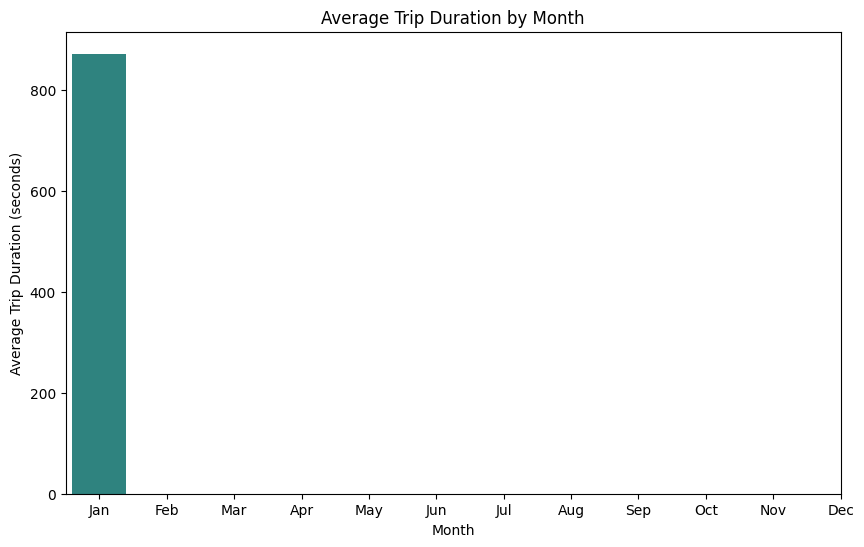

In [43]:
df['month'] = pd.to_datetime(df['start_time']).dt.month
monthly_avg_duration = df.groupby('month')['duration_sec'].mean()

# Plotting the average trip duration by month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_duration.index, y=monthly_avg_duration.values, palette='viridis')
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
